In [ ]:
import sys
!{sys.executable} -m pip install rake_nltk
!{sys.executable} -m pip install yake
!{sys.executable} -m spacy download en_core_web_lg 

     |████████████████████████████████| 827.9 MB 1.2 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
!{sys.executable} -m pip install wordcloud

In [ ]:
import pandas as pd
import re
import math
import spacy
import string
import numpy as np
from spacy.lang.en.stop_words import STOP_WORDS
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from rake_nltk import Rake
from yake.highlight import TextHighlighter
from nltk import ngrams
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [ ]:
d = pd.read_csv("Course Descriptions - Tabellenblatt2-2.csv")

In [ ]:
dff = pd.read_csv("MIE1624 - Group Project Course Curriculum.csv")

In [ ]:
d=d.drop(labels="Credits", axis=1)

In [ ]:
dff=dff.drop(labels="Coursera", axis=1)

In [ ]:
dfff=dff.drop(labels="Skills", axis=1)

In [ ]:
dfff

,Course Name,Company,Course Description,Topics
0,Introduction to Data Science Specialization,IBM,Interested in learning more about data science...,Describe what data science and machine learnin...
1,Introduction to Data Science in Python,University of Michigan,This course will introduce the learner to the ...,Understand techniques such as lambdas and mani...
2,Introduction to Data Analytics,IBM,This course presents a gentle introduction int...,NaN
3,Applied Data Science with Python Specialization,University of Michigan,The 5 courses in this University of Michigan s...,Conduct an inferential statistical analysis\n\...
4,Data Analysis Using Python,University of Pennsylvania,This course provides an introduction to basic ...,Apply basic data science techniques using Pyth...
...,...,...,...,...
68,Big Data Analytics Using Spark,UC San Diego,"In data science, data is called ""big"" if it ca...",Programming Spark using Pyspark\nIdentifying t...
69,Data Science: Computational Thinking with Python,Berkeley,We live in an era of unprecedented access to d...,"Basics of the Python programming language, and..."
70,Statistical Thinking for Data Science and Anal...,Columbia,This statistics and data analysis course will ...,Week 1 – Introduction to Data Science\n\nWeek ...
71,Introduction to Computational Thinking and Dat...,MIT,6.00.2x will teach you how to use computation ...,Advanced programming in Python 3\nKnapsack pro...


In [ ]:
dfff=dfff.rename(columns={"Course Name":"Course Title", "Company": "University", "Course Description": "Short Description", "Topics":"Syllabus"})

In [ ]:
column_names = ["University", "Course Title","Short Description","Syllabus"]

In [ ]:
dfff=dfff.reindex(columns=column_names)

In [ ]:
df=pd.concat([d,dfff])

In [ ]:
df

,University,Course Title,Short Description,Syllabus
0,University of British Columbia,Porgramming for Data Science,Program design and data manipulation with Pyth...,Pseudo-code. Program design and structure. Flo...
1,University of British Columbia,Computing Platforms for Data Science,"How to install, maintain, and use the data sci...","ntroduction to software, shells, tools, and fi..."
2,University of British Columbia,Programming for Data Manipulation,Program design and data manipulation with R. O...,Program design and data manipulation using ind...
3,University of British Columbia,Fundamental concepts in probability including ...,Fundamental concepts in probability including ...,Descriptive statistics including measures of l...
4,University of British Columbia,Algorithms and Data Structures,How to choose and use appropriate algorithms a...,Basic algorithms. Recursion. Data structures i...
...,...,...,...,...
68,UC San Diego,Big Data Analytics Using Spark,"In data science, data is called ""big"" if it ca...",Programming Spark using Pyspark\nIdentifying t...
69,Berkeley,Data Science: Computational Thinking with Python,We live in an era of unprecedented access to d...,"Basics of the Python programming language, and..."
70,Columbia,Statistical Thinking for Data Science and Anal...,This statistics and data analysis course will ...,Week 1 – Introduction to Data Science\n\nWeek ...
71,MIT,Introduction to Computational Thinking and Dat...,6.00.2x will teach you how to use computation ...,Advanced programming in Python 3\nKnapsack pro...


In [ ]:
def preprocess_text(narrative):
    narrative = narrative.translate(str.maketrans('', '', string.punctuation))
    _RE_COMBINE_WHITESPACE = re.compile(r"\s+")
    narrative = _RE_COMBINE_WHITESPACE.sub(" ", narrative).strip()
    narrative = narrative.lower()
    return narrative

In [ ]:
def handle_punctuation(text):
    return re.sub(r'(?<=[?.,!")])(?=[^\s])', r' ', text)



In [ ]:
def get_number_unique_words(narratives):
    count_vectorizer = CountVectorizer()
    X = count_vectorizer.fit_transform(narratives)
    return len(count_vectorizer.get_feature_names())

In [ ]:
def highlight_keywords(text):
    r = Rake()
    r.extract_keywords_from_text(text)
    keywords_rake = r.get_ranked_phrases_with_scores()[:10]
    keywords_rake_reversed = []
    for ituple in keywords_rake:
        keywords_rake_reversed.append(tuple(reversed(ituple)))
    th_rake = TextHighlighter(max_ngram_size = 7, highlight_pre = "<code style=background:yellow;color:black>", highlight_post= "</code>")
    return th_rake.highlight(text, keywords_rake_reversed)

In [ ]:
df

,University,Course Title,Short Description,Syllabus
0,University of British Columbia,Porgramming for Data Science,Program design and data manipulation with Pyth...,Pseudo-code. Program design and structure. Flo...
1,University of British Columbia,Computing Platforms for Data Science,"How to install, maintain, and use the data sci...","ntroduction to software, shells, tools, and fi..."
2,University of British Columbia,Programming for Data Manipulation,Program design and data manipulation with R. O...,Program design and data manipulation using ind...
3,University of British Columbia,Fundamental concepts in probability including ...,Fundamental concepts in probability including ...,Descriptive statistics including measures of l...
4,University of British Columbia,Algorithms and Data Structures,How to choose and use appropriate algorithms a...,Basic algorithms. Recursion. Data structures i...
...,...,...,...,...
68,UC San Diego,Big Data Analytics Using Spark,"In data science, data is called ""big"" if it ca...",Programming Spark using Pyspark\nIdentifying t...
69,Berkeley,Data Science: Computational Thinking with Python,We live in an era of unprecedented access to d...,"Basics of the Python programming language, and..."
70,Columbia,Statistical Thinking for Data Science and Anal...,This statistics and data analysis course will ...,Week 1 – Introduction to Data Science\n\nWeek ...
71,MIT,Introduction to Computational Thinking and Dat...,6.00.2x will teach you how to use computation ...,Advanced programming in Python 3\nKnapsack pro...


In [ ]:
df.dropna(axis=0)

,University,Course Title,Short Description,Syllabus
0,University of British Columbia,Porgramming for Data Science,Program design and data manipulation with Pyth...,Pseudo-code. Program design and structure. Flo...
1,University of British Columbia,Computing Platforms for Data Science,"How to install, maintain, and use the data sci...","ntroduction to software, shells, tools, and fi..."
2,University of British Columbia,Programming for Data Manipulation,Program design and data manipulation with R. O...,Program design and data manipulation using ind...
3,University of British Columbia,Fundamental concepts in probability including ...,Fundamental concepts in probability including ...,Descriptive statistics including measures of l...
4,University of British Columbia,Algorithms and Data Structures,How to choose and use appropriate algorithms a...,Basic algorithms. Recursion. Data structures i...
...,...,...,...,...
68,UC San Diego,Big Data Analytics Using Spark,"In data science, data is called ""big"" if it ca...",Programming Spark using Pyspark\nIdentifying t...
69,Berkeley,Data Science: Computational Thinking with Python,We live in an era of unprecedented access to d...,"Basics of the Python programming language, and..."
70,Columbia,Statistical Thinking for Data Science and Anal...,This statistics and data analysis course will ...,Week 1 – Introduction to Data Science\n\nWeek ...
71,MIT,Introduction to Computational Thinking and Dat...,6.00.2x will teach you how to use computation ...,Advanced programming in Python 3\nKnapsack pro...


In [ ]:
df["Syllabus_punct"] =df["Syllabus"]
#df["Syllabus_kw"] = df["Syllabus"].apply(highlight_keywords)
df["Syllabus_punct"] = df["Syllabus_punct"].astype(str).apply(handle_punctuation)
df["Description_punct"]=df["Short Description"].astype(str).apply(handle_punctuation)
#df["Syllabus_punct"] = df["Narrative_punct"].apply(preprocess_text)
syllabi = [syllabus for syllabus in df.loc[:, "Syllabus_punct"]] 
descriptions = [description for description in df.loc[:, "Description_punct"]] 

In [ ]:
type(df["Syllabus"][1])

pandas.core.series.Series

In [ ]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [ ]:
nlp.disable_pipes('ner')
print(nlp.pipe_names)

['tagger', 'parser']


In [ ]:
def spacy_tokenizer(tex):
    tokens = nlp(tex)
    tokens = [word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in tokens]
    tokens = [word for word in tokens if word not in stopwords and word not in punctuations]
    tokens = " ".join([token for token in tokens])
    return tokens

In [ ]:
stopwords = list(STOP_WORDS)
punctuations = string.punctuation

In [ ]:
df["Processed_Syllabus"] = df["Syllabus_punct"].apply(spacy_tokenizer)
df["Processed_Description"]=df["Description_punct"].apply(spacy_tokenizer)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
def vectorize(text, max_features):    
    vectorizer = TfidfVectorizer(max_features = max_features)
    X = vectorizer.fit_transform(text)
    return X

In [ ]:
text = df["Processed_Syllabus"].values
# max features is the maximum number of unique words out of all of narratives
max_features = get_number_unique_words(syllabi)

X = vectorize(text, max_features)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from math import floor, sqrt
num_posts = X.shape[0]
number_clusters = floor(sqrt(num_posts))

In [ ]:
!{sys.executable} -m pip install umap-learn

     |████████████████████████████████| 86 kB 6.0 MB/s 
     |████████████████████████████████| 1.1 MB 35.4 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=45aed870f6fc2e9df7cb4287e2b056f0daf5378225c07cfd1153c61bd9c88aa9
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=ae38210271ad49fe4481d80645ed756afaeceabbaaa11d12f6ae1a9d4aec3d8e
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [ ]:
import umap
import umap.umap_ as umap

umap_embeddings = umap.UMAP(n_neighbors = 15, 
                            n_components = 5,
                            min_dist=0.0,
                            metric='cosine').fit_transform(X)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [ ]:
!{sys.executable} -m pip install hdbscan

     |████████████████████████████████| 6.4 MB 25.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size=2311905 sha256=64946d0939925dcf37898fcb67eba38cd993521535cc1f678b6e499477fd2394
  Stored in directory: /root/.cache/pip/wheels/73/5f/2f/9a259b84003b84847c259779206acecabb25ab56f1506ee72b
Successfully built hdbscan


In [ ]:
import hdbscan
cluster = hdbscan.HDBSCAN(metric = 'euclidean',
                          min_cluster_size = 10,
                          cluster_selection_method='eom').fit(umap_embeddings)  

In [ ]:
clusters = cluster.labels_.tolist()

In [ ]:
y_pred = np.array(clusters) 

In [ ]:
frame = df

In [ ]:
frame ["Clusters"]=clusters

In [ ]:
no_clusters = len(set(frame.Clusters))

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(verbose = 1, perplexity = 50)  
X_embedded = tsne.fit_transform(X.toarray())

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 374 samples in 0.001s...
[t-SNE] Computed neighbors for 374 samples in 0.030s...
[t-SNE] Computed conditional probabilities for sample 374 / 374
[t-SNE] Mean sigma: 0.319957
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.754063
[t-SNE] KL divergence after 1000 iterations: 1.015332


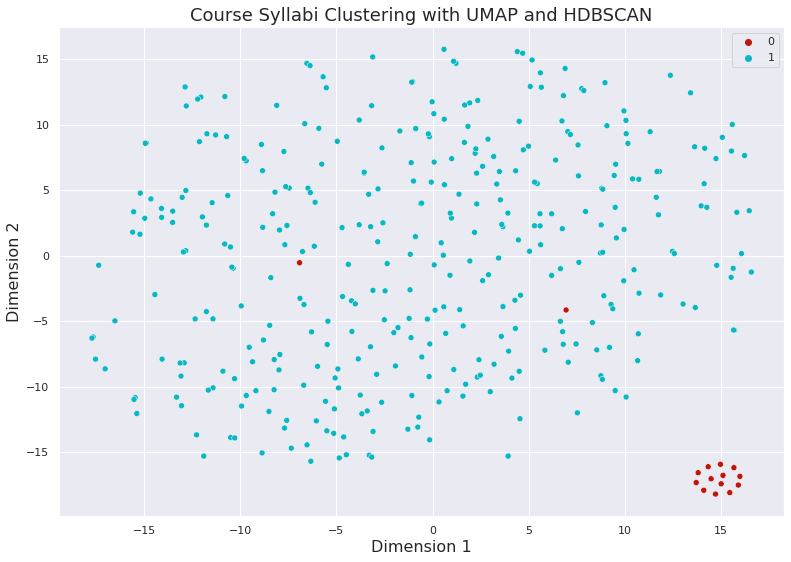

In [ ]:
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(13,9)})

# colors
palette = sns.hls_palette(no_clusters, l=.4, s=.9)

# plot
sns_plot = sns.scatterplot(x = X_embedded[:,0], y = X_embedded[:,1], hue = y_pred, legend = 'full', palette = palette)
plt.title('Course Syllabi Clustering with UMAP and HDBSCAN', fontsize = 18)
plt.xlabel('Dimension 1', fontsize = 16)
plt.ylabel('Dimension 2', fontsize = 16)
plt.show()
fig = sns_plot.get_figure()
fig.savefig('output.png')

In [ ]:
filtr = (frame["Clusters"] == 1)
smokefra = frame.loc[filtr].copy()

In [ ]:
smokefra.shape

(359, 9)

In [ ]:
smokefra["Course Title"].tolist()

['Porgramming for Data Science',
 'Computing Platforms for Data Science',
 'Programming for Data Manipulation',
 'Fundamental concepts in probability including conditional, joint, and marginal distributions. Statistical view of data coming from a probability distribution.',
 'Algorithms and Data Structures',
 'Data Visualization I',
 'Statistical Inference and Computation I',
 'Supervised Learning I',
 'Databases and Data Retrieval',
 'Data Science Workflows',
 'Regression I',
 'Feature and Model Selection',
 'Collaborative Software Development',
 'Communication and Argumentation',
 'Regression II',
 'Supervised Learning II',
 'Data Visualization II',
 'Statistical Inference and Computation II',
 'Unsupervised Learning',
 'Spatial and Temporal Models',
 'Web and Cloud Computing',
 'Privacy, Ethics, and Security',
 'Experimentation and Causal Inference',
 'Capstone Project',
 'Corpus Linguistics',
 'Parsing for Computational Linguistics',
 'Computational Semantics',
 'Advanced Corpus Li

In [ ]:
text = df["Processed_Description"].values
# max features is the maximum number of unique words out of all of narratives
max_features = get_number_unique_words(descriptions)

X = vectorize(text, max_features)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
umap_embeddings = umap.UMAP(n_neighbors = 15, 
                            n_components = 5,
                            min_dist=0.0,
                            metric='cosine').fit_transform(X)

In [ ]:
cluster = hdbscan.HDBSCAN(metric = 'euclidean',
                          min_cluster_size = 10,
                          cluster_selection_method='eom').fit(umap_embeddings)  

In [ ]:
clusters = cluster.labels_.tolist()

In [ ]:
frame ["Cluster"]=clusters

In [ ]:
no_clusters = len(set(frame.Cluster))

In [ ]:
y_pred = np.array(clusters) 

In [ ]:
tsne = TSNE(verbose = 1, perplexity = 50)  
X_embedded = tsne.fit_transform(X.toarray())

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 374 samples in 0.001s...
[t-SNE] Computed neighbors for 374 samples in 0.034s...
[t-SNE] Computed conditional probabilities for sample 374 / 374
[t-SNE] Mean sigma: 0.302918
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.892433
[t-SNE] KL divergence after 1000 iterations: 1.061882


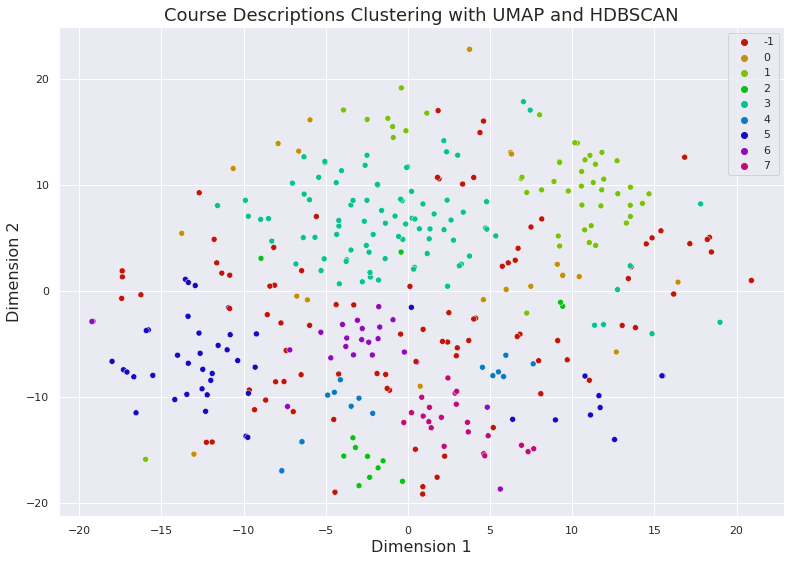

In [ ]:
# sns settings
sns.set(rc={'figure.figsize':(13,9)})

# colors
palette = sns.hls_palette(no_clusters, l=.4, s=.9)

# plot
sns_plot = sns.scatterplot(x = X_embedded[:,0], y = X_embedded[:,1], hue = y_pred, legend = 'full', palette = palette)
plt.title('Course Descriptions Clustering with UMAP and HDBSCAN', fontsize = 18)
plt.xlabel('Dimension 1', fontsize = 16)
plt.ylabel('Dimension 2', fontsize = 16)
plt.show()
fig = sns_plot.get_figure()
fig.savefig('output.png')

In [ ]:
filtr = (frame["Cluster"] == 0)
smokeframe0 = frame.loc[filtr].copy()

In [ ]:
Smokefra0=smokeframe0.dropna(axis=0)

In [ ]:
tex= Smokefra0["Syllabus"].to_list()

In [ ]:
text=' '.join(tex)

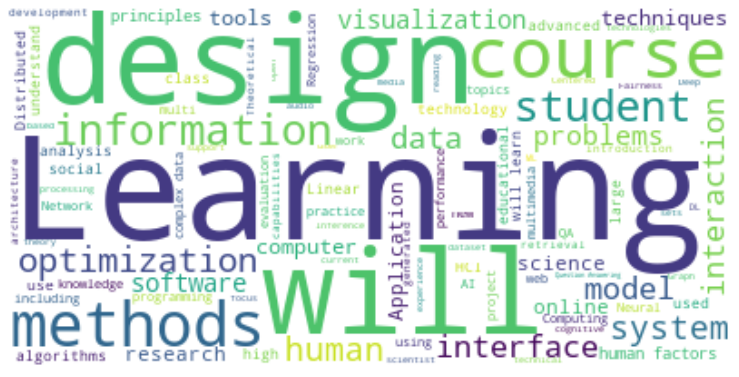

In [ ]:

wc = WordCloud(max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
courselist0=smokeframe0["Course Title"]

In [ ]:
courselist0.to_csv ("courselist0.csv", index = False)

In [ ]:
processed = smokeframe0["Processed_Description"].to_list()
processed='-'.join(processed)
ngram_counts = Counter(ngrams(processed.split(), 1))
ngram_counts.most_common(10)

[(('human',), 25),
 (('design',), 22),
 (('student',), 17),
 (('course',), 17),
 (('use',), 15),
 (('information',), 14),
 (('system',), 13),
 (('datum',), 12),
 (('learn',), 12),
 (('tool',), 10)]

In [ ]:
processed = smokeframe0["Processed_Description"].to_list()
processed='-'.join(processed)
ngram_counts = Counter(ngrams(processed.split(), 2))
ngram_counts.most_common(10)

[(('human', 'factor'), 6),
 (('machine', 'learning'), 4),
 (('large', 'dataset'), 4),
 (('design', 'principle'), 4),
 (('user', 'interface'), 3),
 (('use', 'variety'), 3),
 (('information', 'retrieval'), 2),
 (('interface', 'design'), 2),
 (('information', 'visualization'), 2),
 (('information', 'system'), 2)]

In [ ]:
filtr = (frame["Cluster"] == 1)
smokeframe1 = frame.loc[filtr].copy()

In [ ]:
smokeframe1

,University,Course Title,Short Description,Syllabus,Syllabus_punct,Description_punct,Processed_Syllabus,Processed_Description,Clusters,Cluster
8,University of British Columbia,Databases and Data Retrieval,How to work with data stored in relational dat...,Relational schemas. SQL queries. Database prog...,Relational schemas. SQL queries. Database prog...,How to work with data stored in relational dat...,relational schema sql query database programmi...,work datum store relational database system st...,1,1
20,University of British Columbia,Web and Cloud Computing,How to use the web as a platform for data coll...,"Networks and the Internet, scraping data, APIs...","Networks and the Internet, scraping data, APIs...",How to use the web as a platform for data coll...,network internet scrape datum api cloud comput...,use web platform datum collection computation ...,1,1
34,University of British Columbia Okanagan,Computing Platforms for Data Science,Installation and configuration of data science...,Introduction to software and tools for Data Sc...,Introduction to software and tools for Data Sc...,Installation and configuration of data science...,introduction software tool data science setup ...,installation configuration datum science softw...,1,1
39,University of British Columbia Okanagan,Databases and Data Retrieval,How to use and query relational SQL and NoSQL ...,Using and querying relational and NoSQL databa...,Using and querying relational and NoSQL databa...,How to use and query relational SQL and NoSQL ...,use query relational nosql database analysis e...,use query relational sql nosql database analys...,1,1
46,University of British Columbia Okanagan,Web and Cloud Computing,How to use the web as a platform for data coll...,Resampling techniques and regularization for l...,Resampling techniques and regularization for l...,How to use the web as a platform for data coll...,resample technique regularization linear model...,use web platform datum collection computation ...,1,1
64,University of Waterloo,Principles of Data Management and Use,A user-oriented approach to the management of ...,Introduction to database systems Relational da...,Introduction to database systems Relational da...,A user-oriented approach to the management of ...,introduction database system relational data m...,user orient approach management large collecti...,1,1
65,University of Waterloo,Database Systems and Implementation,The objective of this course is to introduce s...,DBMS Architecture Data Storage Access Methods ...,DBMS Architecture Data Storage Access Methods ...,The objective of this course is to introduce s...,dbms architecture data storage access methods ...,objective course introduce student fundamental...,1,1
72,University of Waterloo,Distributed Systems,"An introduction to distributed systems, emphas...",Fundamental Architectures and Models of Distri...,Fundamental Architectures and Models of Distri...,"An introduction to distributed systems, emphas...",fundamental architectures models distributed s...,introduction distribute system emphasize multi...,1,1
74,University of Waterloo,Database Engineering,Project-oriented course that covers the implem...,Introduction Managing Primary and Secondary St...,Introduction Managing Primary and Secondary St...,Project-oriented course that covers the implem...,introduction manage primary secondary storage ...,project orient course cover implementation rel...,1,1
75,University of Waterloo,Parallel and Distributed Database Systems,Algorithms and architectures used in parallel ...,Introduction and distribution architectures Di...,Introduction and distribution architectures Di...,Algorithms and architectures used in parallel ...,introduction distribution architecture distrib...,algorithm architecture use parallel database m...,1,1


In [ ]:
Smokefra1=smokeframe1.dropna(axis=0)

In [ ]:
tex= Smokefra1["Syllabus"].to_list()

In [ ]:
text=' '.join(tex)

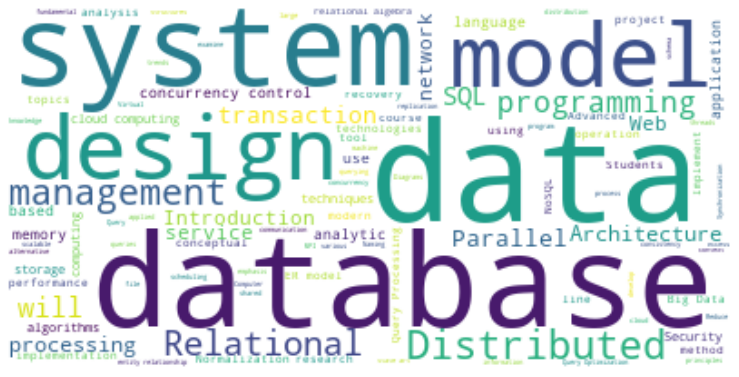

In [ ]:

wc = WordCloud(max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
courselist1=smokeframe1["Course Title"]

In [ ]:
courselist0.to_csv ("courselist0.csv", index = False)

In [ ]:
processed = smokeframe1["Processed_Description"].to_list()
processed='-'.join(processed)
ngram_counts = Counter(ngrams(processed.split(), 1))
ngram_counts.most_common(10)

[(('datum',), 75),
 (('system',), 67),
 (('database',), 63),
 (('data',), 34),
 (('use',), 33),
 (('design',), 29),
 (('cloud',), 27),
 (('distribute',), 26),
 (('relational',), 25),
 (('management',), 25)]

In [ ]:
processed = smokeframe1["Processed_Description"].to_list()
processed='-'.join(processed)
ngram_counts = Counter(ngrams(processed.split(), 2))
ngram_counts.most_common(10)

[(('relational', 'database'), 13),
 (('database', 'system'), 11),
 (('database', 'management'), 10),
 (('concurrency', 'control'), 10),
 (('management', 'system'), 9),
 (('distribute', 'system'), 7),
 (('design', 'implementation'), 6),
 (('e.', 'g.'), 6),
 (('datum', 'system'), 6),
 (('query', 'processing'), 5)]

In [ ]:
filtr = (frame["Cluster"] == 2)
smokeframe2 = frame.loc[filtr].copy()

In [ ]:
Smokefra2=smokeframe2.dropna(axis=0)

In [ ]:
tex= Smokefra2["Syllabus"].to_list()

In [ ]:
text=' '.join(tex)

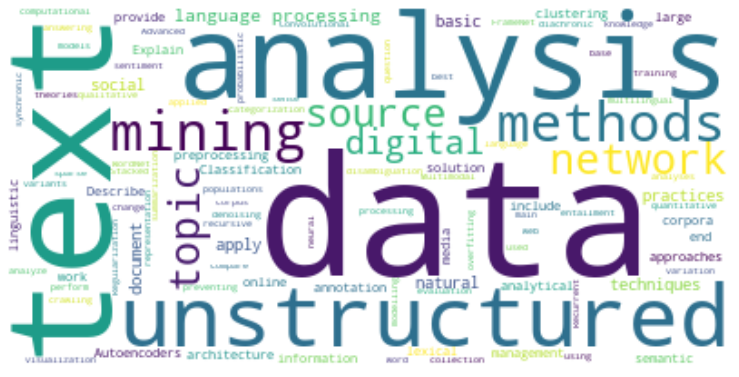

In [ ]:

wc = WordCloud(max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
courselist2=smokeframe2["Course Title"]

In [ ]:
courselist2.to_csv ("courselist2.csv", index = False)

In [ ]:
processed = smokeframe2["Processed_Description"].to_list()
processed='-'.join(processed)
ngram_counts = Counter(ngrams(processed.split(), 1))
ngram_counts.most_common(10)

[(('text',), 32),
 (('datum',), 19),
 (('mining',), 16),
 (('course',), 9),
 (('include',), 7),
 (('technique',), 7),
 (('analysis',), 7),
 (('topic',), 6),
 (('data',), 6),
 (('basic',), 5)]

In [ ]:
processed = smokeframe2["Processed_Description"].to_list()
processed='-'.join(processed)
ngram_counts = Counter(ngrams(processed.split(), 2))
ngram_counts.most_common(10)

[(('datum', 'mining'), 5),
 (('natural', 'language'), 4),
 (('text', 'datum'), 4),
 (('analysis', 'text'), 3),
 (('text', 'mining'), 3),
 (('social', 'medium'), 2),
 (('e.', 'g.'), 2),
 (('mining', 'topic'), 2),
 (('management', 'analysis'), 2),
 (('unstructured', 'datum'), 2)]

In [ ]:
filtr = (frame["Cluster"] == 3)
smokeframe3 = frame.loc[filtr].copy()

In [ ]:
Smokefra3=smokeframe3.dropna(axis=0)

In [ ]:
tex= Smokefra3["Syllabus"].to_list()

In [ ]:
text=' '.join(tex)

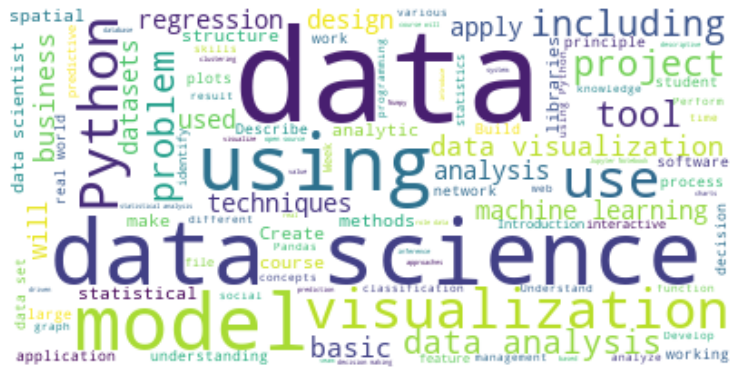

In [ ]:

wc = WordCloud(max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
courselist0=smokeframe3["Course Title"]

In [ ]:
courselist0.to_csv ("courselist0.csv", index = False)

In [ ]:
processed = smokeframe3["Processed_Description"].to_list()
processed='-'.join(processed)
ngram_counts = Counter(ngrams(processed.split(), 1))
ngram_counts.most_common(10)

[(('datum',), 319),
 (('data',), 168),
 (('science',), 154),
 (('course',), 152),
 (('use',), 83),
 (('analysis',), 78),
 (('learn',), 75),
 (('python',), 72),
 (('skill',), 57),
 (('visualization',), 50)]

In [ ]:
processed = smokeframe3["Processed_Description"].to_list()
processed='-'.join(processed)
ngram_counts = Counter(ngrams(processed.split(), 2))
ngram_counts.most_common(10)

[(('datum', 'science'), 73),
 (('data', 'science'), 55),
 (('datum', 'analysis'), 28),
 (('real', 'world'), 24),
 (('machine', 'learning'), 20),
 (('data', 'scientist'), 17),
 (('big', 'datum'), 15),
 (('datum', 'scientist'), 13),
 (('data', 'set'), 13),
 (('data', 'analysis'), 13)]

In [ ]:
filtr = (frame["Cluster"] == 4)
smokeframe4 = frame.loc[filtr].copy()

In [ ]:
Smokefra4=smokeframe4.dropna(axis=0)

In [ ]:
tex= Smokefra4["Syllabus"].to_list()

In [ ]:
text=' '.join(tex)

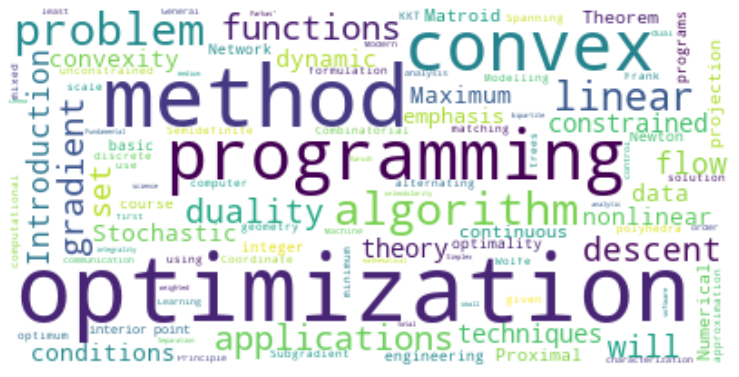

In [ ]:

wc = WordCloud(max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
courselist0=smokeframe4["Course Title"]

In [ ]:
courselist4.to_csv ("courselist4.csv", index = False)

In [ ]:
processed = smokeframe4["Processed_Description"].to_list()
processed='-'.join(processed)
ngram_counts = Counter(ngrams(processed.split(), 1))
ngram_counts.most_common(10)

[(('optimization',), 29),
 (('method',), 18),
 (('programming',), 17),
 (('algorithm',), 15),
 (('problem',), 11),
 (('linear',), 11),
 (('convex',), 9),
 (('use',), 7),
 (('mathematical',), 7),
 (('duality',), 7)]

In [ ]:
processed = smokeframe4["Processed_Description"].to_list()
processed='-'.join(processed)
ngram_counts = Counter(ngrams(processed.split(), 2))
ngram_counts.most_common(10)

[(('machine', 'learning'), 4),
 (('linear', 'programming'), 4),
 (('optimization', 'problem'), 3),
 (('interior', 'point'), 3),
 (('point', 'method'), 3),
 (('nonconvex', 'optimization'), 3),
 (('gradient', 'descent'), 3),
 (('mathematical', 'programming'), 2),
 (('optimization', 'algorithm'), 2),
 (('algorithm', 'optimization'), 2)]

In [ ]:
filtr = (frame["Cluster"] == 5)
smokeframe5 = frame.loc[filtr].copy()

In [ ]:
processed = smokeframe5["Processed_Description"].to_list()
processed='-'.join(processed)
ngram_counts = Counter(ngrams(processed.split(), 1))
ngram_counts.most_common(10)

[(('model',), 50),
 (('regression',), 35),
 (('linear',), 24),
 (('datum',), 22),
 (('method',), 22),
 (('use',), 18),
 (('statistical',), 17),
 (('variable',), 17),
 (('analysis',), 17),
 (('include',), 15)]

In [ ]:
Smokefra5=smokeframe5.dropna(axis=0)

In [ ]:
tex= Smokefra5["Syllabus"].to_list()

In [ ]:
text=' '.join(tex)

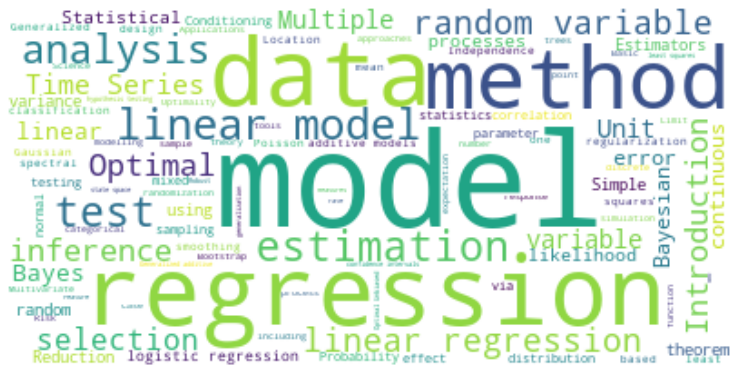

In [ ]:

wc = WordCloud(max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
courselist0=smokeframe5["Course Title"]

In [ ]:
courselist0.to_csv ("courselist0.csv", index = False)

In [ ]:
processed = smokeframe5["Processed_Description"].to_list()
processed='-'.join(processed)
ngram_counts = Counter(ngrams(processed.split(), 2))
ngram_counts.most_common(10)

[(('linear', 'regression'), 13),
 (('random', 'variable'), 7),
 (('regression', 'model'), 6),
 (('time', 'series'), 6),
 (('linear', 'model'), 5),
 (('cross', 'validation'), 4),
 (('discrete', 'continuous'), 4),
 (('logistic', 'regression'), 4),
 (('topic', 'include'), 4),
 (('series', 'model'), 4)]

In [ ]:
filtr = (frame["Cluster"] == 6)
smokeframe6 = frame.loc[filtr].copy()

In [ ]:
Smokefra6=smokeframe6.dropna(axis=0)

In [ ]:
tex= Smokefra6["Syllabus"].to_list()

In [ ]:
text=' '.join(tex)

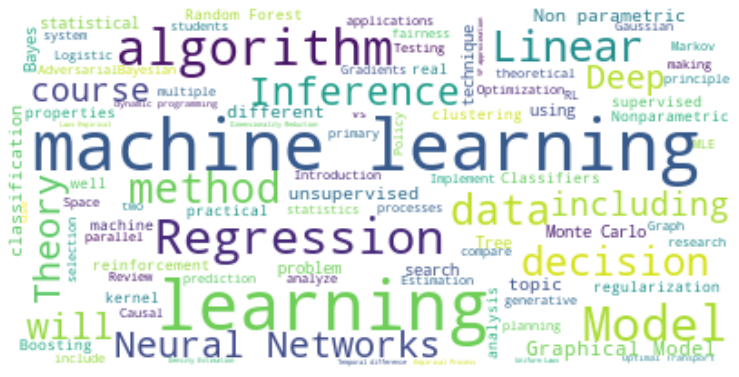

In [ ]:

wc = WordCloud(max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
courselist6=smokeframe0["Course Title"]

In [ ]:
courselist.to_csv ("courselist0.csv", index = False)

In [ ]:
processed = smokeframe6["Processed_Description"].to_list()
processed='-'.join(processed)
ngram_counts = Counter(ngrams(processed.split(), 1))
ngram_counts.most_common(10)

[(('learning',), 56),
 (('machine',), 45),
 (('learn',), 27),
 (('algorithm',), 25),
 (('course',), 18),
 (('use',), 15),
 (('datum',), 13),
 (('student',), 11),
 (('include',), 11),
 (('practical',), 10)]

In [ ]:
processed = smokeframe6["Processed_Description"].to_list()
processed='-'.join(processed)
ngram_counts = Counter(ngrams(processed.split(), 2))
ngram_counts.most_common(10)

[(('machine', 'learning'), 27),
 (('machine', 'learn'), 9),
 (('learning', 'algorithm'), 5),
 (('application', 'machine'), 4),
 (('learning', 'method'), 4),
 (('classification', 'regression'), 3),
 (('support', 'vector'), 3),
 (('practical', 'application'), 3),
 (('algorithm', 'use'), 3),
 (('use', 'machine'), 3)]

In [ ]:
filtr = (frame["Cluster"] == 7)
smokeframe7 = frame.loc[filtr].copy()

In [ ]:
Smokefra7=smokeframe7.dropna(axis=0)

In [ ]:
tex= Smokefra7["Syllabus"].to_list()

In [ ]:
text=' '.join(tex)

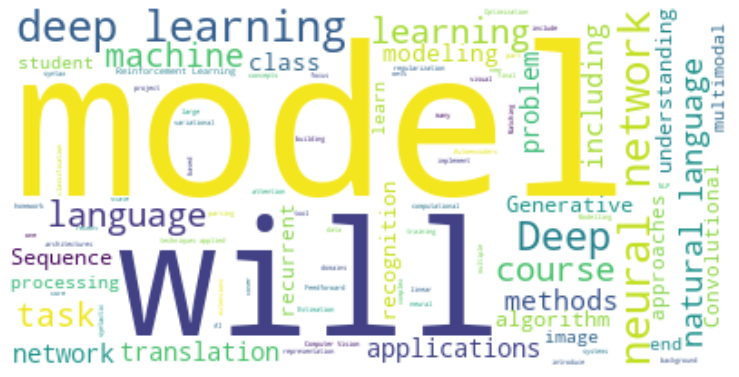

In [ ]:

wc = WordCloud(max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
courselist7=smokeframe7["Course Title"]

In [ ]:
courselist7.to_csv ("courselist7.csv", index = False)

In [ ]:
processed = smokeframe7["Processed_Description"].to_list()
processed='-'.join(processed)
ngram_counts = Counter(ngrams(processed.split(), 1))
ngram_counts.most_common(10)

[(('language',), 30),
 (('deep',), 29),
 (('learning',), 29),
 (('network',), 26),
 (('neural',), 24),
 (('model',), 23),
 (('course',), 20),
 (('natural',), 15),
 (('task',), 13),
 (('machine',), 12)]

In [ ]:
processed = smokeframe7["Processed_Description"].to_list()
processed='-'.join(processed)
ngram_counts = Counter(ngrams(processed.split(), 2))
ngram_counts.most_common(10)

[(('neural', 'network'), 22),
 (('deep', 'learning'), 17),
 (('natural', 'language'), 15),
 (('language', 'processing'), 8),
 (('machine', 'learning'), 5),
 (('language', 'understanding'), 4),
 (('machine', 'translation'), 3),
 (('learning', 'recent'), 3),
 (('learning', 'include'), 3),
 (('state', 'art'), 3)]

In [ ]:
filtr = (frame["Cluster"] == 8)
smokeframe8 = frame.loc[filtr].copy()

In [ ]:
smokeframe8

,University,Course Title,Short Description,Syllabus,Syllabus_punct,Description_punct,Processed_Syllabus,Processed_Description,Clusters,Cluster


In [ ]:
processed = smokeframe8["Processed_Description"].to_list()
processed='-'.join(processed)
ngram_counts = Counter(ngrams(processed.split(), 1))
ngram_counts.most_common(10)

[]

In [ ]:
processed = smokeframe8["Processed_Description"].to_list()
processed='-'.join(processed)
ngram_counts = Counter(ngrams(processed.split(), 2))
ngram_counts.most_common(10)

In [ ]:
processed = df["Processed_Description"].to_list()
processed='-'.join(processed)
ngram_counts = Counter(ngrams(processed.split(), 2))
ngram_counts.most_common(10)

[(('datum', 'science'), 88),
 (('machine', 'learning'), 86),
 (('data', 'science'), 76),
 (('datum', 'analysis'), 33),
 (('real', 'world'), 32),
 (('neural', 'network'), 28),
 (('e.', 'g.'), 26),
 (('natural', 'language'), 26),
 (('deep', 'learning'), 23),
 (('machine', 'learn'), 22)]

In [ ]:
processed = df["Processed_Description"].to_list()
processed='-'.join(processed)
ngram_counts = Counter(ngrams(processed.split(), 3))
ngram_counts.most_common(10)

In [ ]:
processed = df["Processed_Description"].to_list()
processed='-'.join(processed)
ngram_counts = Counter(ngrams(processed.split(), 1))
ngram_counts.most_common(10)

In [ ]:
processed = df["Processed_Syllabus"].to_list()
processed='-'.join(processed)
ngram_counts = Counter(ngrams(processed.split(),2))
ngram_counts.most_common(10)

In [ ]:
processed = df["Processed_Syllabus"].to_list()
processed='-'.join(processed)
ngram_counts = Counter(ngrams(processed.split(), 1))
ngram_counts.most_common(10)

In [ ]:
processed = df["Processed_Syllabus"].to_list()
processed='-'.join(processed)
ngram_counts = Counter(ngrams(processed.split(), 3))
ngram_counts.most_common(10)